[View in Colaboratory](https://colab.research.google.com/github/paxx13/gym/blob/master/gym.ipynb)

this notebook explores different RL methods using gym as part of the Move37 online course offered by https://www.theschool.ai/

# setup environment

In [0]:
%%capture
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg- dev xvfb xephyr libav-tools xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

In [0]:
%%capture
!apt-get install xvfb -y

In [0]:
%%capture
!apt install freeglut3-dev

In [0]:
%%capture
!pip install pyvirtualdisplay
!pip install piglet
!pip install pyopengl
!pip install gym

In [0]:
from pyvirtualdisplay import Display
display=Display(visible=0, size=(320, 240)).start()

import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML
import numpy as np

# model

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation space:  Box(4,)
Action space:  Discrete(2)


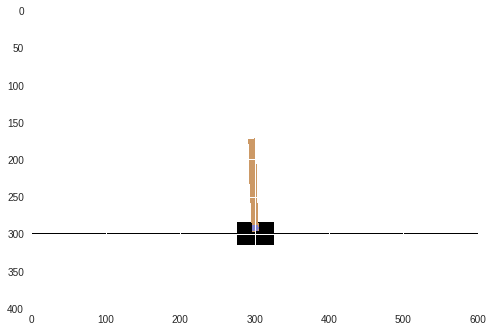

In [8]:
import gym
env = gym.make('CartPole-v0')
env.reset()

plt.imshow(env.render(mode='rgb_array'))
print("Observation space: ", env.observation_space)
print("Action space: ", env.action_space)

In [0]:
def run_episode(env, parameters, stop_when_done=True):
  frames = []
  observation = env.reset()
  totalreward = 0
  
  for i in range(100):
    frames.append(env.render(mode="rgb_array"))
    action = 0 if np.matmul(parameters, observation) < 0 else 1
    observation , reward, done, info = env.step(action)
    totalreward += reward
    if done and stop_when_done:
      break
      
  return frames, totalreward

In [10]:
params = np.random.rand(4) * 2 -1
frames,_  = run_episode(env, params, stop_when_done=False)

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [0]:
def createAnimation(frames):
  plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[1] / 72.0), dpi=72)
  patch = plt.imshow(frames[0])
  plt.axis("off")
  animate = lambda i:patch.set_data(frames[i])
  return anim.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)

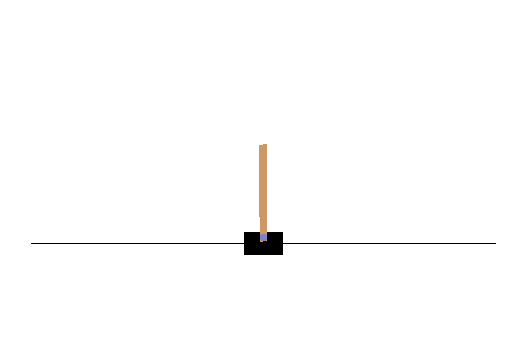

In [12]:
ani = createAnimation(frames)
HTML(ani.to_jshtml())

# strategies


random search

In [0]:
bestParams = None
bestReward = 0

for _ in range(10000):
  params = np.random.rand(4) * 2 -1
  frames, reward  = run_episode(env, params)
  if reward > bestReward:
    bestReward = reward
    bestParams = params
    if reward == 100:
      break


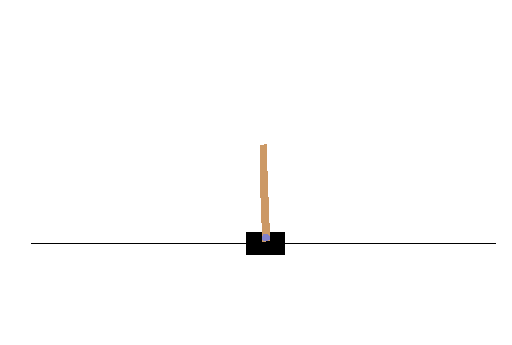

In [14]:
ani = createAnimation(frames)
HTML(ani.to_jshtml())